In [1]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from genetic_one import Gen1

import random
random.seed(99)

In [2]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

In [3]:
N1 = 100
N2 = 100
Ef = 3
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


In [4]:
print("bands",bands_F(33, 66))
print("det_sq",det_sq(33, 66))

bands [ 0.03649265 -0.03649265]
det_sq 80.97603092802864


(2, 100, 100)


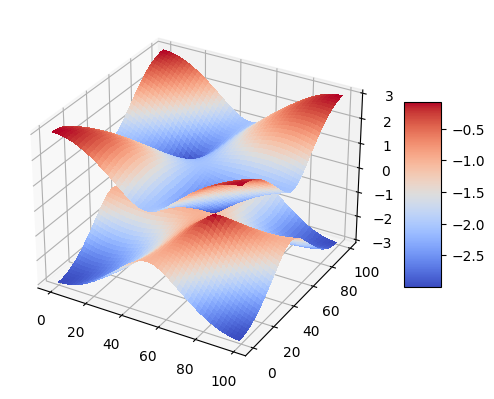

In [5]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [0.00000000e+00 6.23008111e-05 6.23008111e-05 6.23008111e-05
 6.23008111e-05]


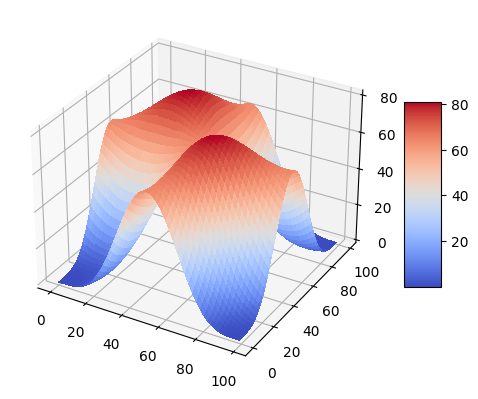

In [6]:
def fit_function(x):

    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
bounds =[[1,N1],[1,N2]] # searching intervals for the solution

# Experiment
experiment = Gen1(fit_function ,input_size, bounds, model_par)

gen_0: [[7, 7], [4, 19], [3, 23], [4, 32], [2, 44], [7, 58], [9, 61], [10, 77], [4, 86], [10, 99], [13, 6], [16, 20], [13, 22], [17, 40], [12, 49], [15, 51], [18, 70], [11, 77], [15, 86], [10, 94], [28, 1], [26, 13], [25, 28], [21, 37], [28, 43], [29, 57], [20, 65], [22, 73], [22, 87], [29, 92], [38, 3], [30, 11], [30, 22], [37, 40], [36, 41], [36, 60], [31, 62], [34, 79], [30, 86], [35, 92], [48, 7], [43, 10], [50, 23], [47, 34], [48, 46], [42, 55], [47, 60], [42, 79], [42, 89], [46, 91], [51, 2], [52, 14], [52, 22], [56, 32], [53, 48], [55, 57], [53, 64], [51, 75], [52, 90], [51, 98], [64, 1], [69, 10], [65, 23], [66, 36], [65, 46], [66, 56], [65, 68], [61, 72], [60, 85], [66, 97], [73, 5], [80, 13], [80, 24], [71, 35], [73, 50], [73, 56], [74, 67], [71, 77], [76, 84], [71, 98], [84, 6], [87, 18], [82, 24], [86, 34], [86, 50], [89, 52], [84, 66], [90, 80], [89, 89], [90, 97], [93, 7], [95, 13], [95, 20], [100, 35], [94, 43], [100, 60], [92, 70], [94, 80], [96, 83], [96, 95]]


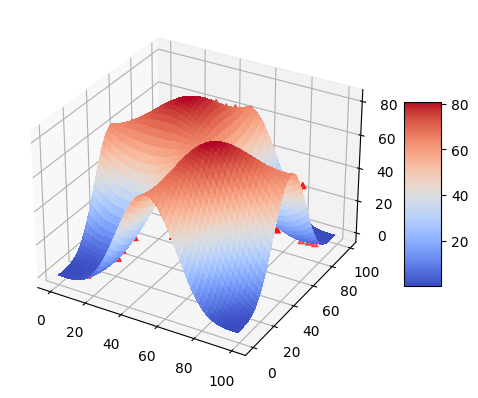

In [8]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0
print("gen_0:", gen_0)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
x,y,z = xyz_gen(gen_0, fit_function)
ax.scatter(x,y,z , c='r', marker='^')
plt.show()

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/485730205.py:19: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


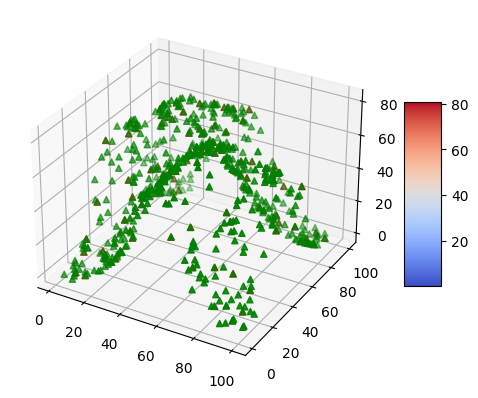

In [9]:
# mutation_1 

clone_family = experiment.mitosis()
# print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

# print("c_dist:",c_dist)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(gen_0, fit_function)
ax.scatter(x,y,z , c='r', marker='^')
x,y,z = xyz_gen(c_dist, fit_function)
ax.scatter(x,y,z , c='g', marker='^')


generation: [[3, 3], [3, 13], [3, 20], [7, 30], [7, 41], [1, 56], [1, 65], [2, 80], [1, 92], [10, 99], [7, 6], [6, 14], [18, 17], [10, 32], [11, 41], [16, 47], [13, 72], [11, 77], [11, 89], [5, 93], [22, 6], [20, 13], [23, 26], [19, 34], [30, 39], [36, 54], [20, 65], [17, 70], [16, 89], [28, 96], [32, 3], [23, 14], [26, 18], [34, 39], [34, 38], [42, 56], [26, 56], [33, 84], [26, 91], [34, 97], [41, 7], [43, 15], [41, 16], [39, 33], [46, 38], [50, 54], [53, 59], [50, 86], [36, 95], [44, 95], [47, 5], [52, 11], [46, 21], [54, 32], [63, 52], [55, 57], [58, 67], [55, 77], [56, 88], [58, 97], [70, 3], [76, 6], [72, 22], [73, 42], [55, 39], [69, 57], [71, 68], [66, 68], [61, 82], [71, 92], [75, 1], [78, 7], [85, 23], [75, 33], [71, 59], [75, 62], [78, 69], [76, 77], [76, 84], [76, 95], [89, 2], [88, 10], [89, 24], [93, 32], [86, 55], [87, 56], [78, 74], [87, 82], [93, 92], [92, 96], [99, 6], [99, 7], [100, 15], [97, 29], [91, 40], [95, 64], [94, 78], [92, 82], [93, 83], [96, 95]]


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/1137040136.py:15: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


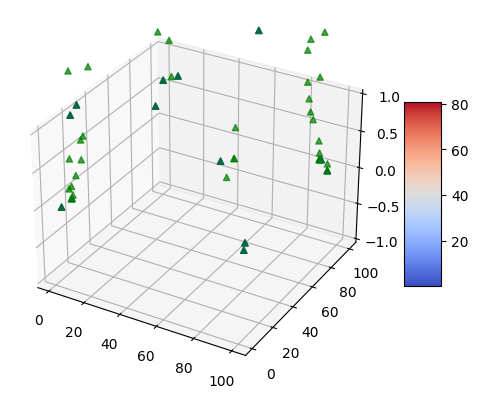

In [10]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)
x,y,z = xyz_gen(c_dist, fit_function)
ax.scatter(x,y,z , c='g', marker='^')
x,y,z = xyz_gen(generation, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

perf [-0.005019863787973143, -1.0989272248585522, -6.021547478498807, -20.772751588669173, -48.31160960028211, -60.30473823804888, -41.65882790467529, -9.138371680429955, -0.3166057800048188, -0.7138324693232594, -0.11205051038913157, -1.2387371431138712, -4.791198332757197, -23.60756783455971, -45.774200622396535, -58.204235146288966, -44.8139774093927, -27.877984331202995, -6.467786891006602, -0.6893907960576888, -7.257802000347966, -4.854168209184662, -15.290759466743998, -26.623886701200743, -41.866135989188955, -69.89721982308112, -71.56567048217335, -58.05070221208425, -13.234944985605281, -27.975159450879893, -28.991374133825875, -7.760847130606821, -12.400322020270018, -45.031710037514216, -43.460061085433615, -69.51087730871312, -74.01449962908382, -62.21908023405793, -31.500107899897394, -41.940820616269725, -48.31160960028211, -49.12392546903629, -43.78471892268837, -44.15577065606062, -58.4076567171296, -64.00000000000003, -60.74140711419953, -64.00000000000003, -49.8632400

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/3710619300.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


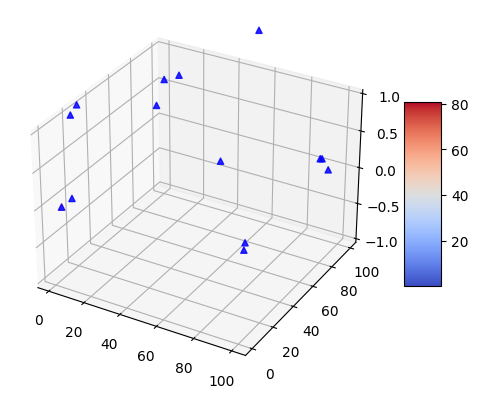

In [11]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(generation, fit_function)
ax.scatter(x1,y1,z1 , c='b', marker='^')

x,y,z = xyz_gen(new_generation, fit_function)
ax.scatter(x,y,z , c='pink', marker='^')

clone_family: [[[71, 92], [62, 92], [78, 92], [70, 87], [68, 93], [71, 93]], [[82, 85], [79, 92], [80, 96], [83, 90], [83, 82], [78, 82]], [[37, 48], [35, 42], [32, 45], [35, 42], [37, 46], [41, 50]], [[37, 48], [34, 48], [30, 46], [44, 43], [37, 44], [41, 43]], [[37, 48], [31, 51], [37, 48], [42, 48], [41, 51], [36, 50]], [[94, 78], [99, 79], [95, 77], [93, 74], [96, 82], [94, 80]], [[48, 40], [43, 45], [45, 34], [60, 38], [52, 40], [52, 43]], [[48, 40], [54, 33], [44, 41], [43, 43], [47, 38], [42, 46]], [[48, 40], [48, 39], [52, 46], [44, 30], [42, 42], [54, 38]], [[3, 3], [2, 4], [2, 2], [4, 2], [9, 15], [8, 1]], [[3, 3], [7, 3], [5, 1], [2, 7], [2, 2], [5, 8]], [[3, 3], [4, 8], [5, 4], [9, 3], [2, 5], [1, 14]], [[3, 3], [8, 5], [9, 7], [8, 7], [9, 1], [5, 2]], [[3, 3], [1, 2], [2, 12], [2, 6], [4, 3], [3, 4]], [[3, 3], [6, 4], [2, 7], [3, 2], [4, 5], [3, 2]]]
c_dist: [[71, 92], [62, 92], [78, 92], [70, 87], [68, 93], [71, 93], [82, 85], [79, 92], [80, 96], [83, 90], [83, 82], [78, 

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/3118554333.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


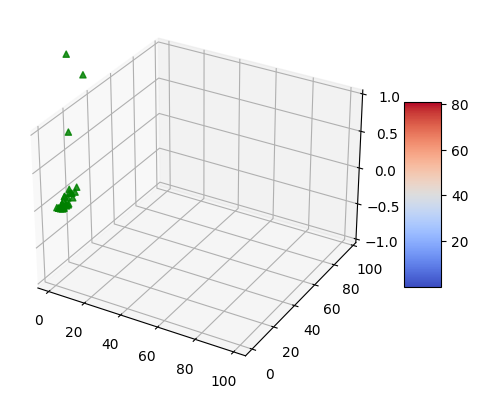

In [12]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, fit_function)
ax.scatter(x1,y1,z1 , c='g', marker='^')

x,y,z = xyz_gen(new_generation, fit_function)
ax.scatter(x,y,z , c='r', marker='^')

generation: [[78, 92], [83, 90], [35, 42], [37, 44], [37, 48], [96, 82], [45, 34], [44, 41], [44, 30], [2, 2], [2, 2], [3, 3], [3, 3], [1, 2], [3, 2]]


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/2583046597.py:16: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


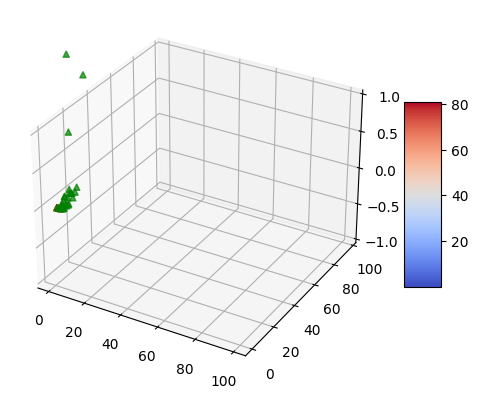

In [13]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]




fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x1,y1,z1 = xyz_gen(c_dist, fit_function)
ax.scatter(x1,y1,z1 , c='g', marker='^',alpha =0.7)

x,y,z = xyz_gen(generation, fit_function)
ax.scatter(x,y,z , c='r', marker='^')

Epochs 0/20
perf [-0.000559969924263921, -1.6460514417513783, -1.2387371431138712, -22.526559350294608, -62.133146193569225, -61.07539458216284, -31.213040944623028, -7.958885450377733, -0.333783445284378, -0.583592135001262, -1.3687870025513558, -0.044646855499373944, -7.6297782975883255, -30.886212124839997, -31.500107899897433, -62.35907090900939, -56.00347152612571, -8.787064195181298, -18.563500996700235, -4.854168209184662, -10.678022466225247, -5.05154869882592, -10.028147495836066, -22.207474633842498, -40.11646123988727, -71.05848107000607, -69.20165663692535, -52.950129108664584, -21.835346051749788, -16.126413490709783, -16.546417182841942, -26.506449022940892, -31.26771538709694, -27.872426341441475, -45.403183233483546, -71.67199859223143, -69.60153072103165, -65.93682983331182, -47.34676998248824, -55.041458301825806, -57.51078490621407, -24.764349420629884, -32.1900048863981, -51.37891036930059, -51.37891036930059, -65.83819970052397, -70.61534830475226, -75.816905098697

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_46396/3194972257.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


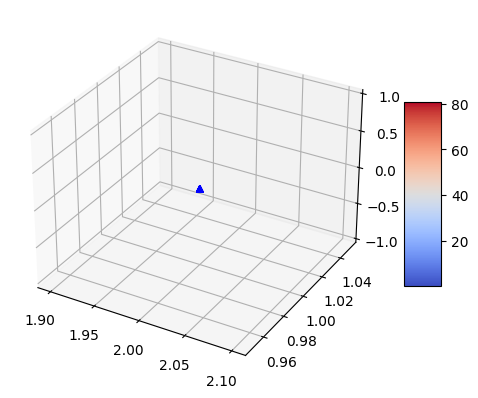

In [14]:
## Automate evolution

nr_epochs = 20
last_generation = experiment.evolve(nr_epochs)
fit = [fit_function(x) for x in last_generation] 
print("fit:",fit)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)


x,y,z = xyz_gen(last_generation, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [15]:
det_sq(34,67)

80.97603092802864

In [16]:
det_sq(33,67)

80.97603092802864